<a href="https://colab.research.google.com/github/Galuhsahfa/image-Prosessing/blob/main/Image_Prosessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

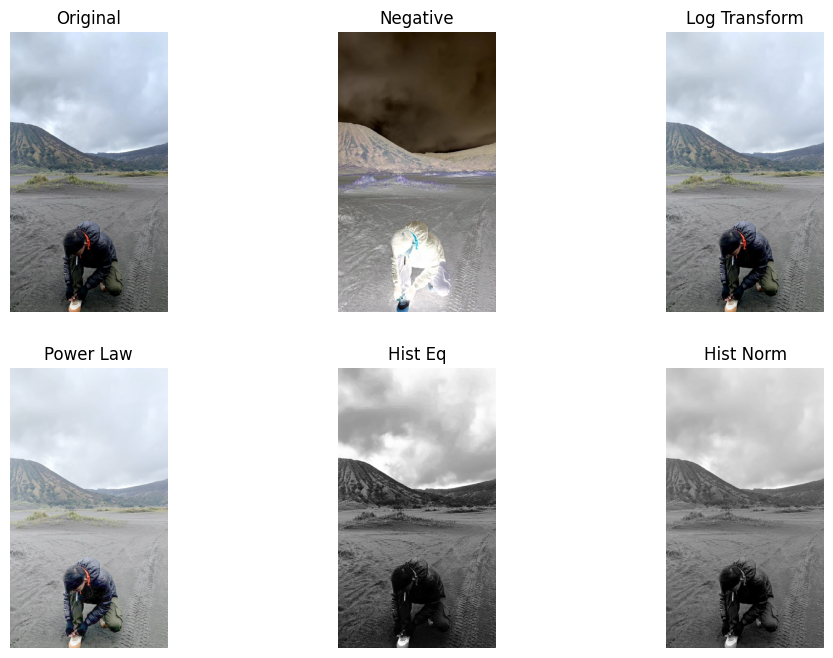

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def negative_image(img):
    return 255 - img

def log_transform(img):
    img = np.float32(img) / 255.0
    c = 1 / np.log(1 + np.max(img))
    log_img = c * np.log(1 + img)
    return np.uint8(log_img * 255)

def power_law_transform(img, gamma=0.5):
    img = np.float32(img) / 255.0
    power_img = np.power(img, gamma)
    return np.uint8(power_img * 255)

def histogram_equalization(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    eq_img = cv2.equalizeHist(gray)
    return eq_img

def histogram_normalization(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    norm_img = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX)
    return norm_img

def rgb_to_hsi(img):
    img = np.float32(img) / 255.0
    r, g, b = cv2.split(img)
    intensity = (r + g + b) / 3
    min_rgb = np.minimum(np.minimum(r, g), b)
    saturation = 1 - (3 * min_rgb / (r + g + b + 1e-6))
    theta = np.arccos(0.5 * ((r - g) + (r - b)) / (np.sqrt((r - g) ** 2 + (r - b) * (g - b)) + 1e-6))
    hue = np.where(b > g, 2 * np.pi - theta, theta)
    hue = hue / (2 * np.pi) * 255
    hsi_img = cv2.merge([hue, saturation * 255, intensity * 255])
    return np.uint8(hsi_img)

def display_images(images, titles):
    plt.figure(figsize=(12, 8))
    for i in range(len(images)):
        plt.subplot(2, 3, i + 1)
        cmap = 'gray' if len(images[i].shape) == 2 else None
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Load image
img = load_image('/fotoku.jpg')

# Apply transformations
neg_img = negative_image(img)
log_img = log_transform(img)
pow_img = power_law_transform(img, gamma=0.5)
heq_img = histogram_equalization(img)
hnorm_img = histogram_normalization(img)
hsi_img = rgb_to_hsi(img)

display_images([img, neg_img, log_img, pow_img, heq_img, hnorm_img],
               ['Original', 'Negative', 'Log Transform', 'Power Law', 'Hist Eq', 'Hist Norm'])
